In [19]:
from ptlpinns.odes import numerical
import numpy as np
import matplotlib.pyplot as plt
import time

In [20]:
N_ITER = 500

### Define time domain

In [21]:
Nx = 200
x_span = (0, 2) 
Nt = 200
t_span = (0, 5)

x = np.linspace(x_span[0], x_span[1], Nx)
t = np.linspace(t_span[0], t_span[1], Nt)
mesh_x, mesh_t = np.meshgrid(x, t)

### Equation parameters

In [22]:
# KPP Fisher
epsilons = [0.0]
D = 0.05 

def u_0_function(x):
    return np.sin(np.pi * x / 2)

u_0 = [u_0_function for _ in range(len(epsilons))]  
forcing = [lambda x, t: 0 for _ in range(len(epsilons))] 
bcs = [[lambda t: 0, lambda t: 0] for _ in range(len(epsilons))]  
polynomial = [lambda u: -u + u**2 for _ in range(len(epsilons))]

result_kpp = numerical.solution_KPP(epsilons, D, polynomial, x_span, t_span, Nx, Nt, u_0, forcing, bcs).squeeze()
result_kpp = result_kpp.swapaxes(0, 1) 

In [23]:
kpp_fisher_0th_order = numerical.kpp_fisher_u0(mesh_x, mesh_t, 2, 0.05)
kpp_fisher_0th_order.shape

(200, 200)

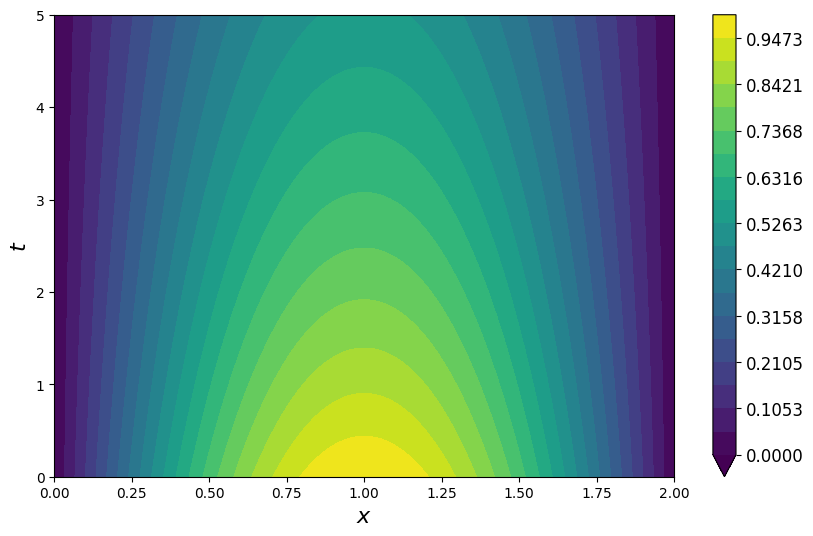

In [24]:
numerical.plot_solution_PDE(kpp_fisher_0th_order, mesh_x, mesh_t, surface=False)

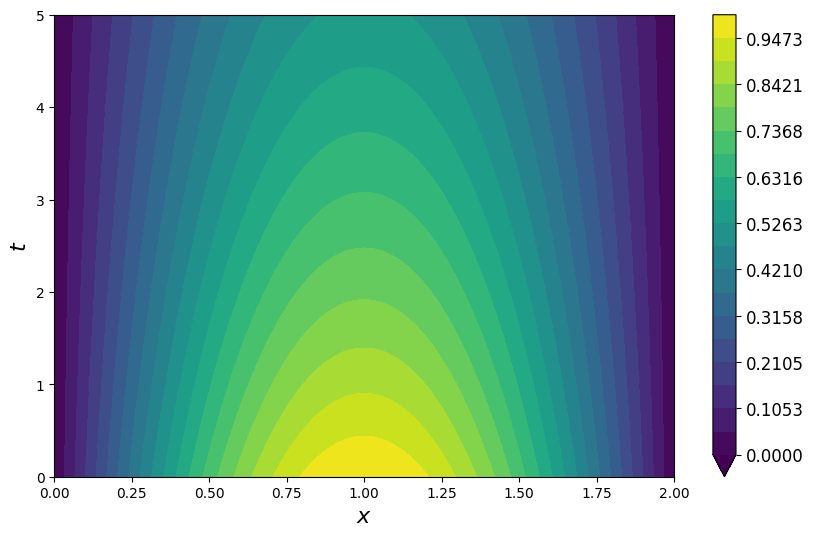

In [25]:
numerical.plot_solution_PDE(result_kpp, mesh_x, mesh_t, surface=False)

In [26]:
c = 1.0           
u0 = u_0_function(x)
v0 = np.zeros_like(x)      
U0 = np.concatenate([u0, v0])

result_wave = numerical.solution_wave(epsilons, c, polynomial, x_span, t_span, Nx, Nt, U0, bcs, forcing=forcing).squeeze()
result_wave = result_wave.swapaxes(0, 1) 

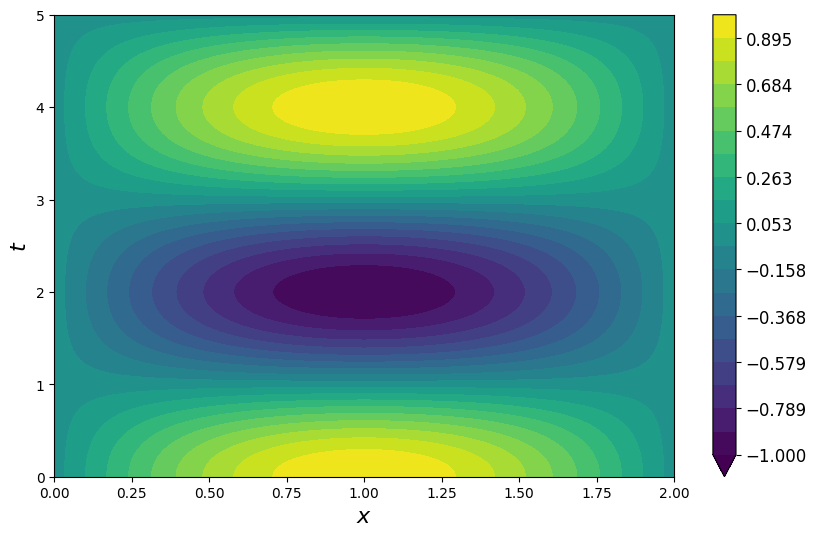

In [27]:
numerical.plot_solution_PDE(result_wave, mesh_x, mesh_t, surface=False)

In [28]:
wave_0th_order = numerical.u0_wave(mesh_x, mesh_t, 2, c)
wave_0th_order.shape

(200, 200)

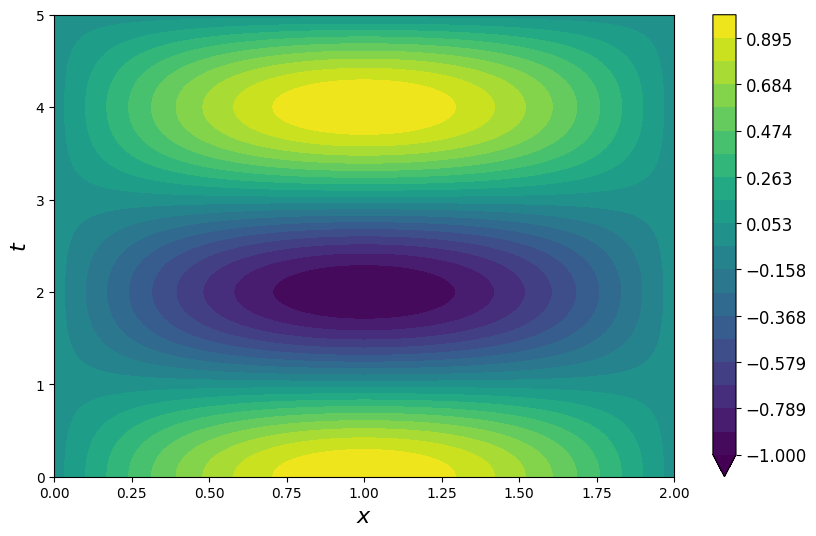

In [29]:
numerical.plot_solution_PDE(wave_0th_order, mesh_x, mesh_t, surface=False)

In [30]:
total_RK45, total_Radau = [], []


for j in range(N_ITER):

    start_RK45 = time.perf_counter()
    
    end_RK45 = time.perf_counter()

        start_Radau = time.perf_counter()
        numerical.solve_ode_equation(ode, t_span, t_eval, ic_list[i], method="Radau", rtol=1e-5, atol=1e-5)[0]
        end_Radau = time.perf_counter()

        RK45_time_list.append(end_RK45 - start_RK45)
        Radau_time_list.append(end_Radau - start_Radau)

    total_RK45.append(RK45_time_list)
    total_Radau.append(Radau_time_list)

    Radau_time.append(np.mean(RK45_time_list[i]))
    RK45_time.append(np.mean(Radau_time_list[i]))

IndentationError: unexpected indent (2871778496.py, line 10)